In [1]:
from utils import get_exp_factor, FITS
from lasco import *
import os

path = os.path.expanduser('~/Desktop/corkit_examples/c3')
filename = '20031028_121805.fits'

filepath = os.path.join(path, filename)

img, header = FITS(filepath)

/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
img, header = 

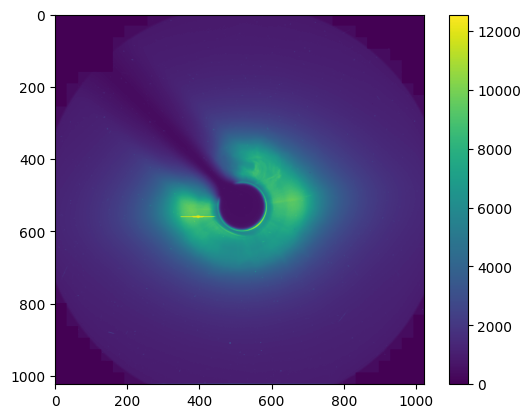

In [2]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.colorbar()

In [3]:
mjd = header['mid_date']

In [4]:
exp_factor, bias = get_exp_factor(header)

In [5]:
header['exptime']*=exp_factor
header['exptime']

19.0002523356

In [6]:
header['OFFSET'] = bias

In [7]:
header['OFFSET']

385.2

In [8]:
from lasco import c3_calfactor

calfac = c3_calfactor(header)
calfac

6.178442e-13

In [9]:
from lasco import read_bkg_full, read_mask_full, read_ramp_full, read_vig_full
mask = read_mask_full()
ramp = read_ramp_full()
bkg = read_bkg_full()
vig = read_vig_full(mjd)

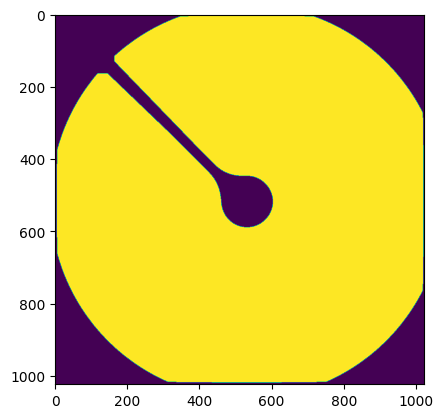

In [26]:
mask
plt.imshow(mask.T)

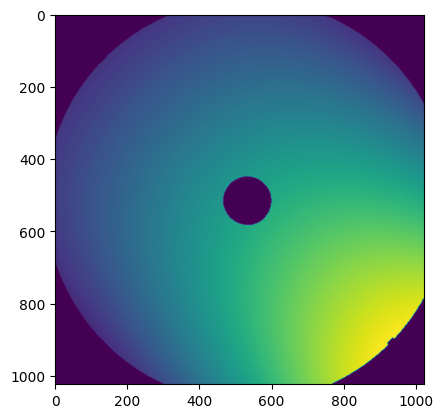

In [28]:
ramp
plt.imshow(ramp.T)

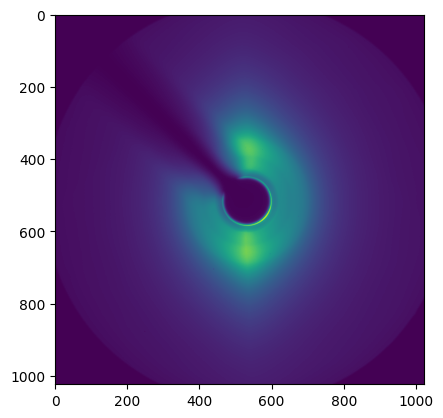

In [31]:
bkg
plt.imshow(bkg.T)

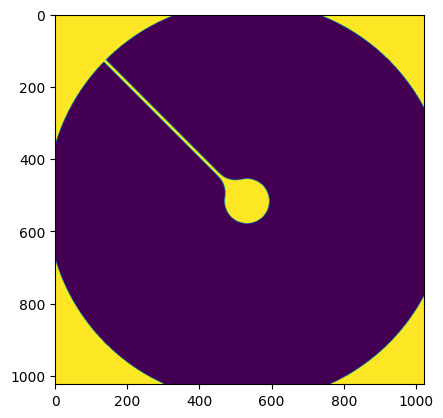

In [29]:
vig
plt.imshow(vig.T)

In [14]:
import numpy as np
header['FILEORIG']

'031028_121852.img'

In [15]:
from utils import correct_var

vig, ramp, bkg, mask = correct_var(header, vig, ramp, bkg, mask)

In [16]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
ramp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
bkg

array([[0.04210526, 0.42105263, 0.50526316, ..., 0.50526316, 0.50526316,
        0.42105263],
       [0.04210526, 0.21052632, 0.12631579, ..., 0.25263158, 0.12631579,
        0.21052632],
       [0.04210526, 0.16842105, 0.12631579, ..., 0.12631579, 0.12631579,
        0.21052632],
       ...,
       [0.04210526, 0.21052632, 0.25263158, ..., 0.21052632, 0.12631579,
        0.21052632],
       [0.71578947, 0.92631579, 0.88421053, ..., 1.09473684, 1.17894737,
        1.17894737],
       [1.89473684, 2.44210526, 2.69473684, ..., 2.90526316, 2.94736842,
        2.90526316]])

In [19]:
vig

array([[10000., 10000., 10000., ..., 10000., 10000., 10000.],
       [10000., 10000., 10000., ..., 10000., 10000., 10000.],
       [10000., 10000., 10000., ..., 10000., 10000., 10000.],
       ...,
       [10000., 10000., 10000., ..., 10000., 10000., 10000.],
       [10000., 10000., 10000., ..., 10000., 10000., 10000.],
       [10000., 10000., 10000., ..., 10000., 10000., 10000.]],
      dtype=float32)

In [20]:
from lasco import c3_calibration_forward
img = c3_calibration_forward(img, header, calfac, vig, mask, bkg, ramp)

In [21]:
np.where(img<=0)

(array([   0,    0,    0, ..., 1023, 1023, 1023]),
 array([   0,    1,    2, ..., 1021, 1022, 1023]))

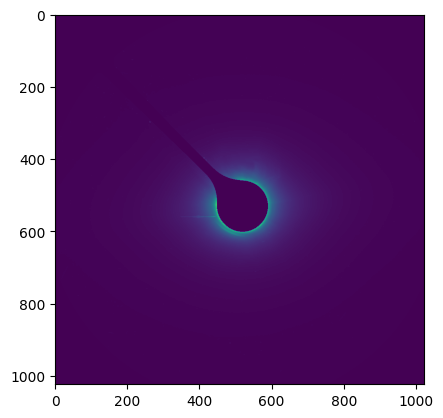

In [22]:
plt.imshow(img)

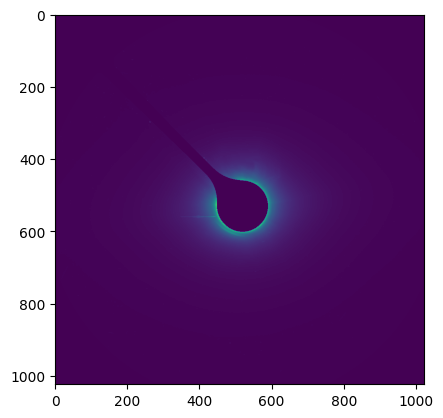

In [23]:
plt.imshow(img)

In [24]:
from skimage import exposure
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

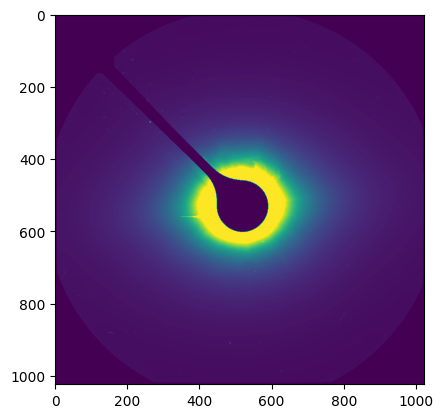

In [25]:
plt.imshow(img_rescale)

In [1]:
from corkit.lasco import level_1
import os

path = os.path.expanduser('~/Desktop/corkit_examples')
file = os.path.join(path, 'c2', '20031022_113005.fits')

img, header = level_1(
    file, 
    os.path.join(path, 'prueba.fits') #saves the file here
)

/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Importing data


FileNotFoundError: [Errno 2] No such file or directory: '/home/jenci/Desktop/corkit_examples/c2/20031022_113005.fits'

In [7]:
from astropy.io import fits

header = fits.getheader('test/c2/19980506_002837.fits')

V15 18 Jun 1997 MAKE_FITS_HDR
V24 12 Jun 98 reduce_level_05,'980506_002930.img','22033503.fts',2

In [5]:
int(3.5)

3

In [10]:
from astropy.io import fits

header = fits.getheader('test/c2/19980506_000206.fits')

header['level_1'] != 1

False